In [52]:
import pandas as pd
import numpy as np
from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
ls

CU_SVM_Classification_Muffins_vs_Cupcakes.ipynb
muffin_vs_cupcake_demo.ipynb*
recipes_muffins_cupcakes.csv*
recipes_muffins_cupcakes_scones.csv*


In [56]:
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


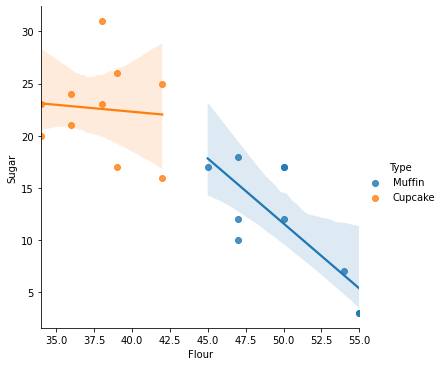

In [57]:
# Lets Do some EDA
# Creating Visualization


sns.lmplot('Flour','Sugar', data = recipes , hue = 'Type')

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Flour', ylabel='Sugar'>

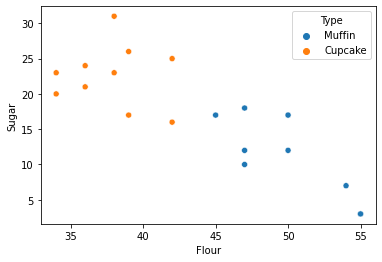

In [58]:
sns.scatterplot('Flour','Sugar', data = recipes , hue = 'Type')

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


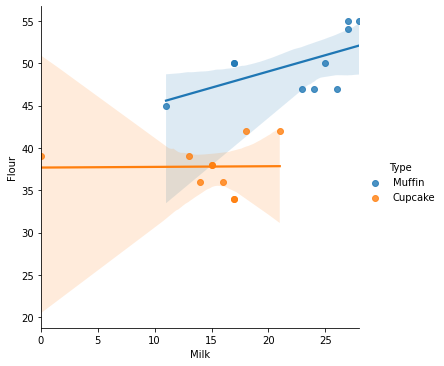

In [59]:
sns.lmplot('Milk','Flour', data = recipes , hue = 'Type')

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


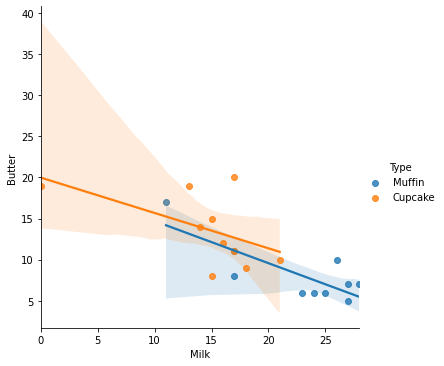

In [60]:
sns.lmplot('Milk','Butter', data = recipes , hue = 'Type')

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


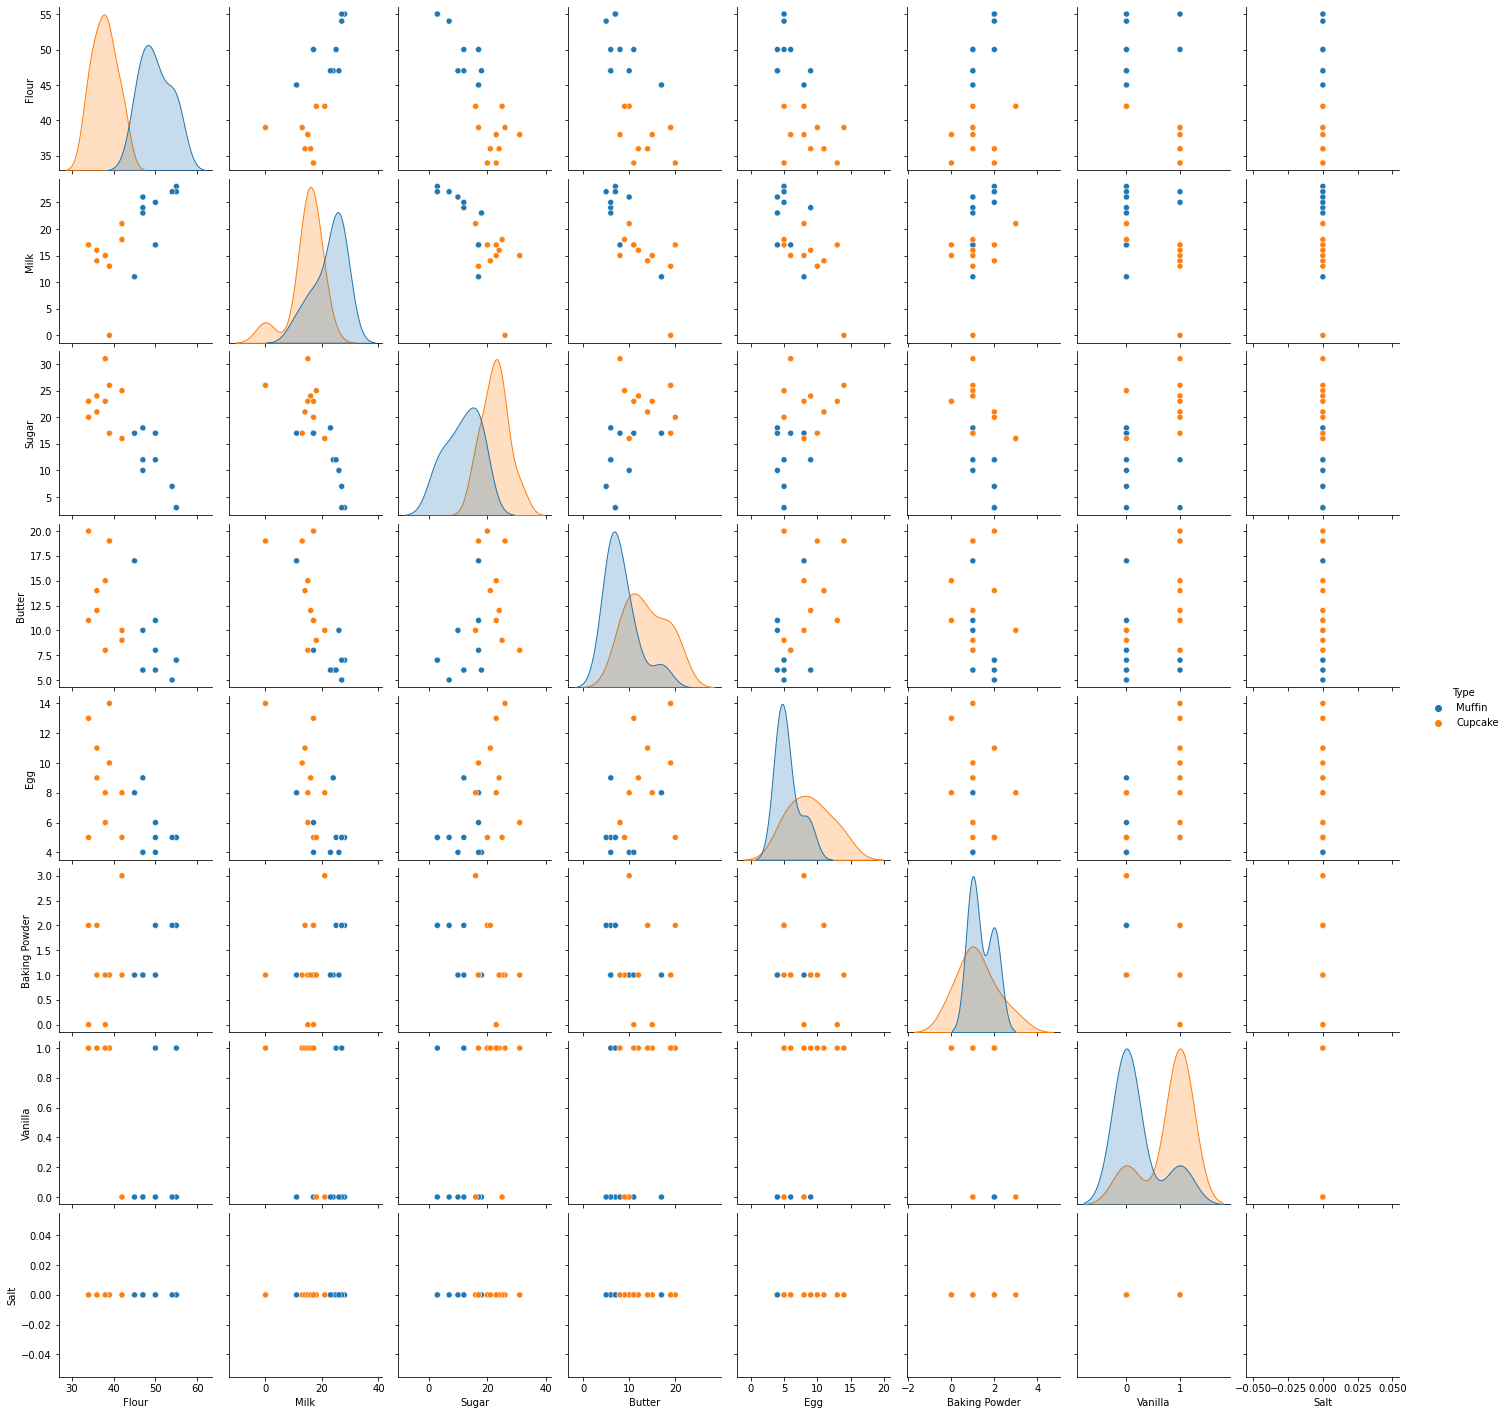

In [61]:
sns.pairplot(recipes, hue= 'Type')

In [68]:
ingredients = recipes[['Flour','Sugar', 'Milk', 'Egg']]

In [69]:
ingredients

,Flour,Sugar,Milk,Egg
0,55,3,28,5
1,47,12,24,9
2,47,18,23,4
3,45,17,11,8
4,50,12,25,5
5,55,3,27,5
6,54,7,27,5
7,47,10,26,4
8,50,17,17,6
9,50,17,17,4


In [70]:
target_feature = recipes['Type']

In [71]:
target_feature

0      Muffin
1      Muffin
2      Muffin
3      Muffin
4      Muffin
5      Muffin
6      Muffin
7      Muffin
8      Muffin
9      Muffin
10    Cupcake
11    Cupcake
12    Cupcake
13    Cupcake
14    Cupcake
15    Cupcake
16    Cupcake
17    Cupcake
18    Cupcake
19    Cupcake
Name: Type, dtype: object

In [72]:
target_feature = np.where(recipes['Type']== 'Muffin', 0,1)

In [73]:
target_feature

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [74]:
# Lets Build the model

model = svm.SVC(kernel = 'linear')
model.fit(ingredients,target_feature)

SVC(kernel='linear')

In [75]:
model

SVC(kernel='linear')

In [76]:
model.coef_[0]

array([-0.40654795,  0.07358369,  0.08538266,  0.07126992])

In [77]:
w= model.coef_[0]

In [78]:
w

array([-0.40654795,  0.07358369,  0.08538266,  0.07126992])

In [79]:
w[0]

-0.4065479485835648

In [80]:
model.intercept_

array([14.53433703])

In [81]:
#y = mx+c

# y = a*x + b



In [82]:
model.support_vectors_

array([[47., 12., 24.,  9.],
       [47., 18., 23.,  4.],
       [45., 17., 11.,  8.],
       [42., 16., 21.,  8.]])

In [87]:
xx = np.linspace(34, 60)
xx

array([34.        , 34.53061224, 35.06122449, 35.59183673, 36.12244898,
       36.65306122, 37.18367347, 37.71428571, 38.24489796, 38.7755102 ,
       39.30612245, 39.83673469, 40.36734694, 40.89795918, 41.42857143,
       41.95918367, 42.48979592, 43.02040816, 43.55102041, 44.08163265,
       44.6122449 , 45.14285714, 45.67346939, 46.20408163, 46.73469388,
       47.26530612, 47.79591837, 48.32653061, 48.85714286, 49.3877551 ,
       49.91836735, 50.44897959, 50.97959184, 51.51020408, 52.04081633,
       52.57142857, 53.10204082, 53.63265306, 54.16326531, 54.69387755,
       55.2244898 , 55.75510204, 56.28571429, 56.81632653, 57.34693878,
       57.87755102, 58.40816327, 58.93877551, 59.46938776, 60.        ])

In [91]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(34, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

In [93]:
yy

array([ -9.67207174,  -6.74045326,  -3.80883477,  -0.87721629,
         2.0544022 ,   4.98602068,   7.91763917,  10.84925765,
        13.78087614,  16.71249463,  19.64411311,  22.5757316 ,
        25.50735008,  28.43896857,  31.37058705,  34.30220554,
        37.23382402,  40.16544251,  43.09706099,  46.02867948,
        48.96029796,  51.89191645,  54.82353494,  57.75515342,
        60.68677191,  63.61839039,  66.55000888,  69.48162736,
        72.41324585,  75.34486433,  78.27648282,  81.2081013 ,
        84.13971979,  87.07133827,  90.00295676,  92.93457525,
        95.86619373,  98.79781222, 101.7294307 , 104.66104919,
       107.59266767, 110.52428616, 113.45590464, 116.38752313,
       119.31914161, 122.2507601 , 125.18237858, 128.11399707,
       131.04561556, 133.97723404])

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


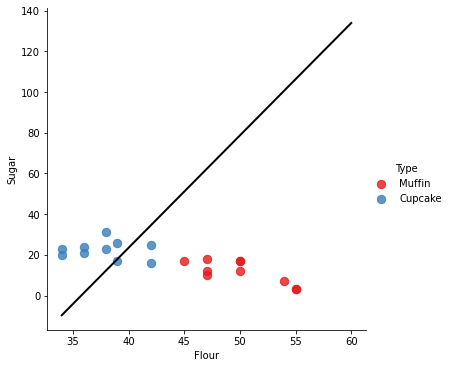

In [92]:
# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


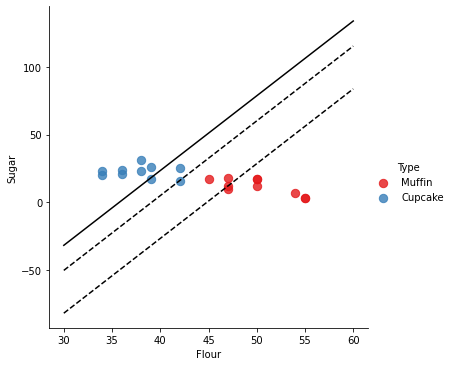

In [90]:
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx,yy, color = 'black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')